0 – G‘azab

1 – Nafrat

2 – Qo‘rquv

3 – Baxt

4 – Qayg‘u

5 – Hayrat

6 – Neytral

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv("data/emotion_sample.csv")
df.head()

,emotion,pixels,Usage
0,0,72 123 219 186 163 37 166 31 115 56 177 179 19...,Training
1,0,71 219 172 250 87 193 26 6 226 21 73 3 186 161...,Training
2,0,57 155 107 38 175 94 223 68 77 26 37 184 225 2...,Training
3,0,203 137 217 250 224 230 126 120 208 106 190 16...,Training
4,0,185 197 116 226 213 98 176 149 73 168 93 134 2...,Training


In [ ]:
X = df['pixels'].apply(lambda x: [int(p) for p in x.split()]).tolist()
X = np.array(X) / 255
y = df['emotion'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=42)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [19]:
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.4111111111111111


In [21]:
for kernel in ['linear', 'poly', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    print(f"{kernel} kernel uchun aniqlik:", model.score(X_test, y_test))


linear kernel uchun aniqlik: 0.4111111111111111
poly kernel uchun aniqlik: 0.3
rbf kernel uchun aniqlik: 0.3111111111111111


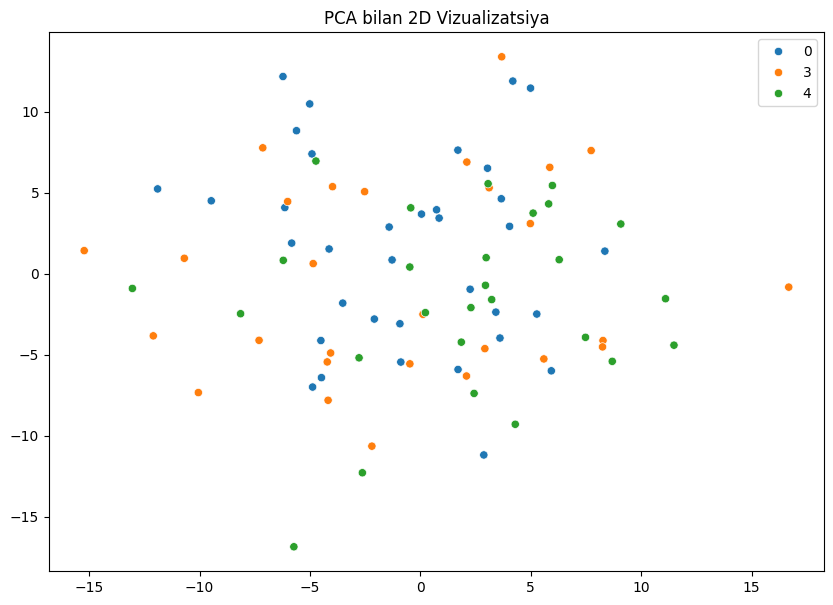

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_test)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1], hue=y_test, palette='tab10')
plt.title("PCA bilan 2D Vizualizatsiya")
plt.show()
